# Visão Computacional - Lista 5

Aqui serão resolvidas as atividades da terceira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Exercício 1 - Detecção de cantos

a) -

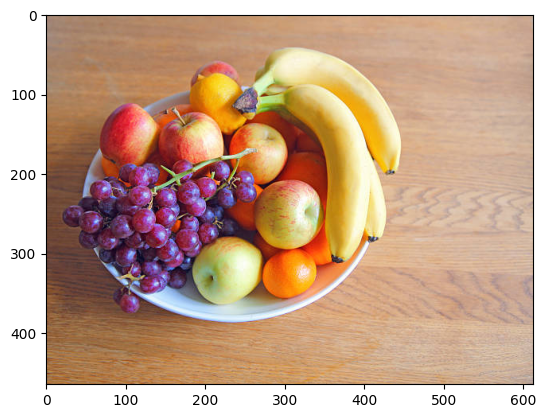

In [2]:
img = cv2.imread('./frutas.jpg')
# img = img[:,:,::-1]
plt.imshow(img[:,:,::-1])
plt.show()

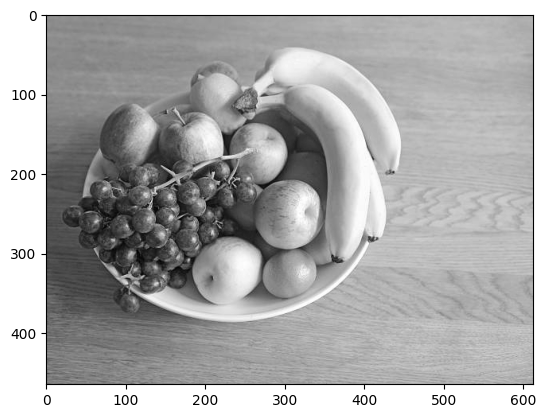

In [3]:
impb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(impb, cmap='gray')
plt.show()

In [4]:
def HarrisCornerDetector(image, blockSize, ksize, k=0.06):
    #image é uma imagem em tons de cinza
    #blockSize é o tamanho da vizinhança considerada para a detecção de cada canto
    #ksize é o tamanho do filtro de Sobel usado para calcular os gradientes horizontal e vertical
    #k é um parâmetro livre do detector de Harris na equação
    #retorna uma imagem binária com o score de cada pixel
    nlin, ncol = image.shape
    image = image/255

    Ix = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    Iy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    Ix2 = Ix ** 2
    Iy2 = Iy ** 2
    Ixy = Ix * Iy

    Rresult = np.zeros((nlin, ncol))
    cont = 0
    for lin in range(blockSize, nlin-blockSize):
        for col in range(blockSize, ncol-blockSize):
            Ix2_block = Ix2[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
            Iy2_block = Iy2[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
            Ixy_block = Ixy[lin - blockSize: lin + blockSize + 1, col - blockSize: col + blockSize + 1]
     
            Sxx = np.sum(Ix2_block)
            Syy = np.sum(Iy2_block)
            Sxy = np.sum(Ixy_block)

            det = Sxx*Syy - Sxy**2
            trace = Sxx + Syy
            
            R = det - k * (trace**2)
            Rresult[lin, col] = R
            
            if R > 0.01:
                cont += 1
    print(cont)
    return Rresult

32374


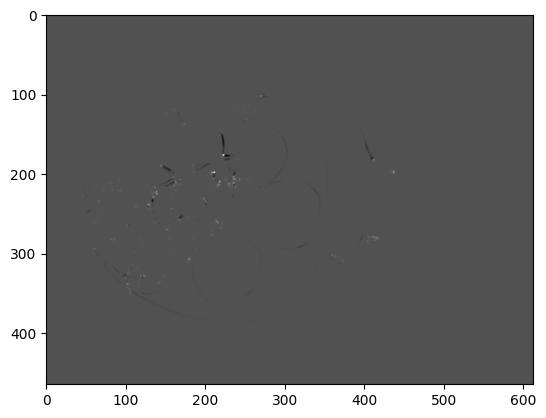

In [5]:
Rresult = HarrisCornerDetector(impb, 1, 3, 0.06)
plt.imshow(Rresult, cmap='gray')
plt.show()

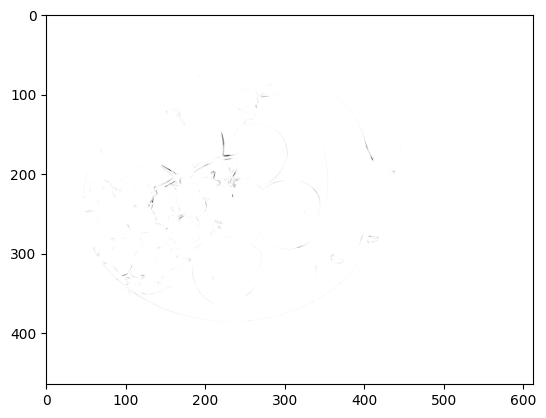

In [6]:
RresultCV = cv2.cornerHarris(impb, 1, 3, 0.06)
plt.imshow(RresultCV, cmap='gray')
plt.show()

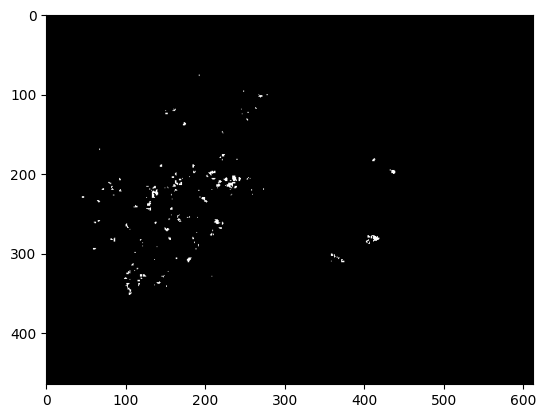

In [7]:
npoints = 1000
PointsInterest = np.zeros(impb.shape)
top_indices = np.argpartition(Rresult.flatten(), -npoints)[-npoints:]
top_row_indices, top_col_indices = np.unravel_index(top_indices, impb.shape)
for i in range(npoints):
    PointsInterest[top_row_indices[i], top_col_indices[i]] = 1

plt.imshow(PointsInterest, cmap='gray')
plt.show()

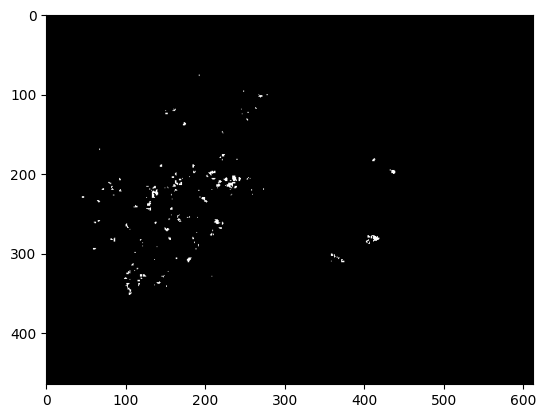

In [8]:
PointsInterestcv = np.zeros(impb.shape)
top_indicescv = np.argpartition(Rresult.flatten(), -npoints)[-npoints:]
top_row_indicescv, top_col_indicescv = np.unravel_index(top_indicescv, impb.shape)
for i in range(npoints):
    PointsInterestcv[top_row_indicescv[i], top_col_indicescv[i]] = 1

plt.imshow(PointsInterestcv, cmap='gray')
plt.show()

b) -

In [9]:
# Encontre os pontos de máximo usando Non Maximal Supression (máximos em janelas 3x3)
def NonMaximalSupression(im, window_size=3, scalar_filter:float=0.01):
    nl = im.shape[0]
    nc = im.shape[1]
    maximos = list()
    for lin in range(int(window_size/2), nl-window_size + int(window_size/2)):
        for col in range(int(window_size/2), nc-window_size + int(window_size/2)):
            window = im[lin-int(window_size/2): lin + (window_size - int(window_size/2)) + 1, col - int(window_size/2): col + (window_size - int(window_size/2)) + 1]
            if im[lin, col] == np.max(window):
                if np.max(window) > scalar_filter * np.max(im):
                    maximos.append((lin, col))

    return maximos

c) -

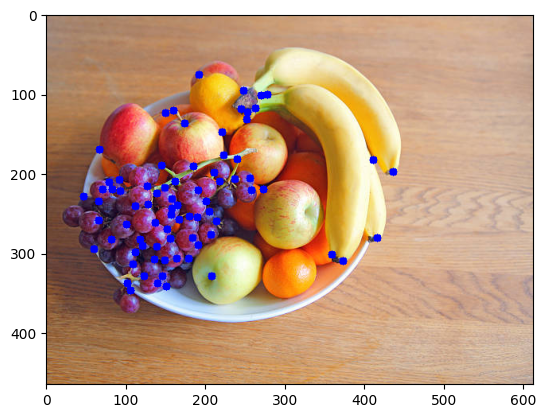

In [10]:
# Meu resultado
maximos = NonMaximalSupression(Rresult, 13, 0.02)

img_maximos = cv2.imread('./frutas.jpg')

for lin, col in maximos:
    cv2.circle(img_maximos, center=(col, lin), radius = 5, color=(255,0,0), thickness = -1)

plt.imshow(img_maximos[:,:,::-1])
plt.show()

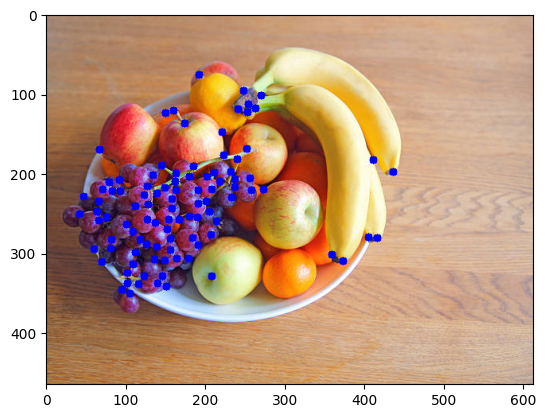

In [11]:
# Resultado Open CV
features = cv2.goodFeaturesToTrack(image=impb, maxCorners=100, 
            qualityLevel=0.01, minDistance = 10, blockSize=3, useHarrisDetector=True, k=0.06)
for i in features:
    x,y = i.ravel()
    cv2.circle(img = img,center = (int(x),int(y)),radius = 5,color=(255,0,0),thickness = -1)
plt.imshow(img[:,:,::-1])
plt.show()

# 2 - Patches e correspondência entre pontos

84018


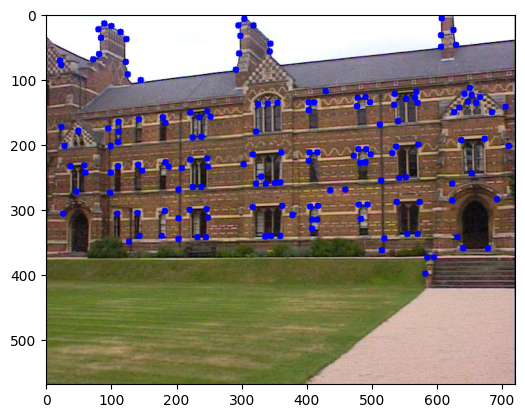

In [12]:
img_a = cv2.imread('./keble_a.jpg')
impb_a = cv2.cvtColor(img_a, cv2.COLOR_BGR2GRAY)

result_a = HarrisCornerDetector(impb_a, 1, 3, 0.06)
maximos_a = NonMaximalSupression(result_a, 13, 0.02)

img_temp = cv2.imread('./keble_a.jpg')

for lin, col in maximos_a:
    cv2.circle(img_temp, center=(col, lin), radius = 5, color=(255,0,0), thickness = -1)

plt.imshow(img_temp[:,:,::-1])
plt.show()

85668


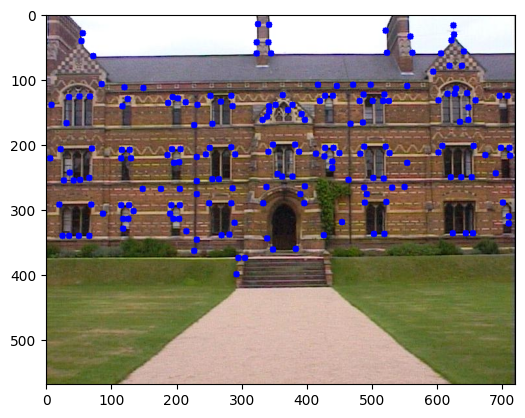

In [13]:
img_b = cv2.imread('./keble_b.jpg')
impb_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2GRAY)

result_b = HarrisCornerDetector(impb_b, 1, 3, 0.06)
maximos_b = NonMaximalSupression(result_b, 13, 0.02)

img_temp = cv2.imread('./keble_b.jpg')

for lin, col in maximos_b:
    cv2.circle(img_temp, center=(col, lin), radius = 5, color=(255,0,0), thickness = -1)

plt.imshow(img_temp[:,:,::-1])
plt.show()

In [14]:
def get_patch(image:np.ndarray, center:list, size:list=5) -> np.ndarray:
    half_size = size // 2
    start_row = center[0] - half_size
    end_row = center[0] + half_size + 1
    start_col = center[1] - half_size
    end_col = center[1] + half_size + 1
    
    # Verifica se o patch está fora dos limites da imagem
    if start_row < 0 or end_row > image.shape[0] or start_col < 0 or end_col > image.shape[1]:
        return None
    
    patch = image[start_row:end_row, start_col:end_col]
    return patch

def faz_matches(img_1:np.ndarray, img_2:np.ndarray, maximos_1:list, maximos_2:list, size_patch:int=13) -> list:
    matches = list()
    
    for y_1, x_1 in maximos_1:
        patch_1 = get_patch(img_1, (y_1, x_1), size_patch)
        if patch_1 is None:
            continue
        
        patch_1 = cv2.GaussianBlur(patch_1, (5, 5), 0)

        best_match = None
        best_score = float('inf')

        for y_2, x_2 in maximos_2:
            patch_2 = get_patch(img_2, (y_2, x_2), size_patch)
            if patch_2 is None:
                continue

            patch_2 = cv2.GaussianBlur(patch_2, (5, 5), 0)
        
            score = np.sum(np.power(patch_1 - patch_2, 2))

            if score < best_score:
                best_score = score
                best_match = (x_2, y_2)
        
        if best_match != None:
            matches.append(((x_1, y_1), best_match, best_score))
    
    return matches

matches_ab = faz_matches(impb_a, impb_b, maximos_a, maximos_b)

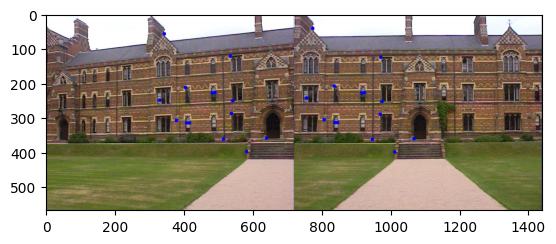

In [15]:
def plot_comparision(img_a:np.ndarray, img_b:np.ndarray, matches:list, min_score:float) -> np.ndarray:
    img_a_temp = img_a.copy()
    img_b_temp = img_b.copy()
    for center1, center2, score in matches:
        if score < min_score:
            cv2.circle(img_a_temp, center=center1, radius = 5, color=(255,0,0), thickness = -1)
            cv2.circle(img_b_temp, center=center2, radius = 5, color=(255,0,0), thickness = -1)
    
    concat_img = np.hstack((img_a_temp, img_b_temp))
    plt.imshow(concat_img[:,:,::-1])
    return concat_img

plot_comparision(img_a, img_b, matches_ab, 6000)
plt.show()

In [16]:
good_matches = [(center1, center2) for (center1, center2, score) in matches_ab if score < 6000]
print(len(good_matches))

14


In [17]:
def my_transform_2(img:np.ndarray, T:np.ndarray, new_x_center:int=0, wide_scalar:float=1) -> np.ndarray:
    lines, columns = img.shape[:2]
    transform_image = np.zeros((lines, int(columns*wide_scalar), 3), dtype=np.uint8)

    borders = [[0, 0, 1], [lines, 0, 1], [0, columns, 1], [lines, columns, 1]]
            
    for line in range(lines):
        for col in range(columns):
            pos_orig = np.array([line, col, 1])

            pos_transformed = T @ pos_orig
            
            new_col = int(round(pos_transformed[1]/pos_transformed[2] + np.abs(new_x_center)))
            new_line = int(round(pos_transformed[0]/pos_transformed[2]))
    
            if (new_line >= 0 and new_line < lines) and (new_col >= 0 and new_col < columns*wide_scalar):
                transform_image[new_line, new_col] = img[line, col]

    return transform_image

def my_estimation(lst1:list, lst2:list) -> np.ndarray:
    matriz_origem = np.zeros((3,len(lst1)))
    matriz_destino = np.zeros((3,len(lst2)))

    for i in range(len(lst1)):
        # Montaremos a matriz de origem com os pontos originais e a matriz de destino com os pontos de destino.
        ponto_origem = lst1[i]
        ponto_destino = lst2[i]

        matriz_origem[0,i] = ponto_origem[0]
        matriz_origem[1,i] = ponto_origem[1]
        matriz_origem[2,i] = 1

        matriz_destino[0,i] = ponto_destino[0]
        matriz_destino[1,i] = ponto_destino[1]
        matriz_destino[2,i] = 1

    # Usaremos a função do numpy lstsq para estimar qual é a matriz de transformação
    estimation_T = np.linalg.lstsq(matriz_origem.T, matriz_destino.T, rcond=None)[0]

    return estimation_T.T

pontos_origem = list()
pontos_destino = list()

for center1, center2 in good_matches:
    pontos_origem.append(center1[::-1])
    pontos_destino.append(center2[::-1])

T = my_estimation(pontos_origem, pontos_destino)

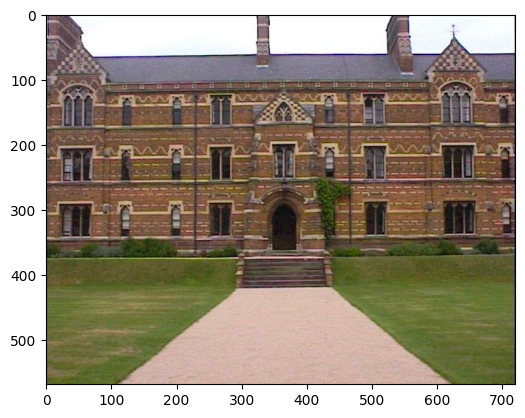

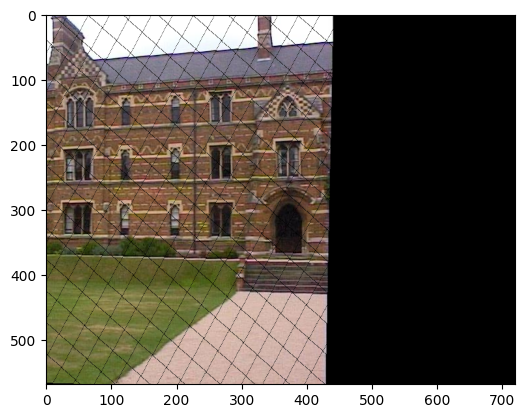

In [18]:
plt.imshow(img_b[:,:,::-1])
plt.show()

new_transform = my_transform_2(img_a, T)

plt.imshow(new_transform[:,:,::-1])
plt.show()

# 3 - Estimando por RANSAC

In [19]:
def ransac_homography(matches_ba, tolerance=5.0, num_iterations=1000):
    max_inliers = []
    best_T = None
    lst1 = list()
    lst2 = list()
    for center1, center2, score in matches_ba:
        lst1.append(center1[::-1])
        lst2.append(center2[::-1])

    for iteration in range(num_iterations):
        indices = np.random.choice(len(lst1), 4, replace=False)
        origem = [lst1[i] for i in indices]
        destino = [lst2[i] for i in indices]

        T = my_estimation(origem, destino)

        destino_transformado = []
        for pt in lst1:
            pos_orig = np.array([pt[0], pt[1], 1])
            pos_transformed = T @ pos_orig
            pos_transformed = pos_transformed / pos_transformed[2]
            destino_transformado.append((pos_transformed[0], pos_transformed[1]))

        inliers = []
        for i in range(len(lst1)):
            dist = np.linalg.norm(np.array(destino_transformado[i]) - np.array(lst2[i]))
            if dist < tolerance:
                inliers.append(i)

        if len(inliers) > len(max_inliers):
            max_inliers = inliers
            best_T = T

    return best_T

T = ransac_homography(matches_ab)

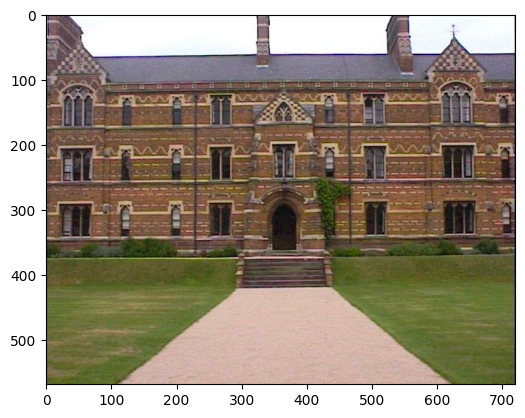

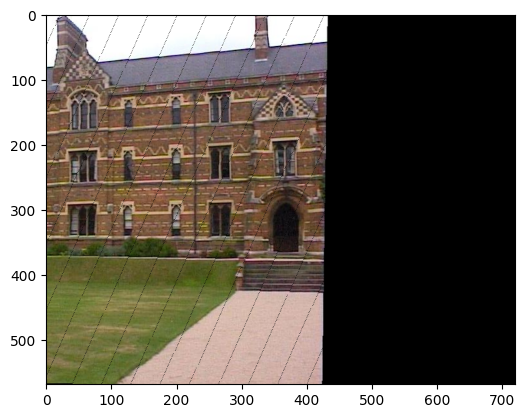

In [20]:
plt.imshow(img_b[:,:,::-1])
plt.show()

new_transform = my_transform_2(img_a, T)

plt.imshow(new_transform[:,:,::-1])
plt.show()

# 4 - Panorâmica

In [21]:
img1 = cv2.imread('./keble_a.jpg')
img2 = cv2.imread('./keble_b.jpg')
img3 = cv2.imread('./keble_c.jpg')

result_1 = HarrisCornerDetector(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), 1, 7, 0.06)
maximos_1 = NonMaximalSupression(result_1, 15, 0.02)

result_2 = HarrisCornerDetector(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), 1, 7, 0.06)
maximos_2 = NonMaximalSupression(result_2, 15, 0.02)

result_3 = HarrisCornerDetector(cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY), 1, 7, 0.06)
maximos_3 = NonMaximalSupression(result_3, 15, 0.02)

195081
207650
209505


In [22]:
matches_12 = faz_matches(img1, img2, maximos_1, maximos_2)
matches_32 = faz_matches(img3, img2, maximos_3, maximos_2)

T1_2 = ransac_homography(matches_12)
T3_2 = ransac_homography(matches_32)

transformed_img1 = my_transform_2(img1, T1_2, new_x_center=265, wide_scalar=1.8)
transformed_img2 = my_transform_2(img2, np.eye(3,3), new_x_center=265, wide_scalar=1.8)
transformed_img3 = my_transform_2(img3, T3_2, new_x_center=265, wide_scalar=1.8)

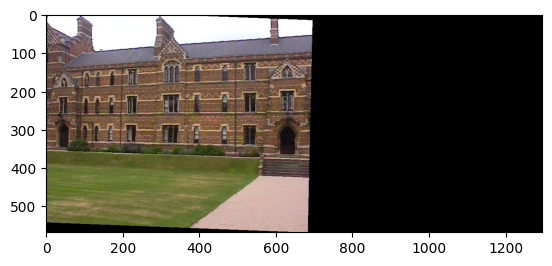

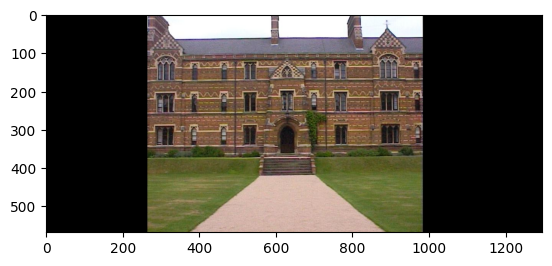

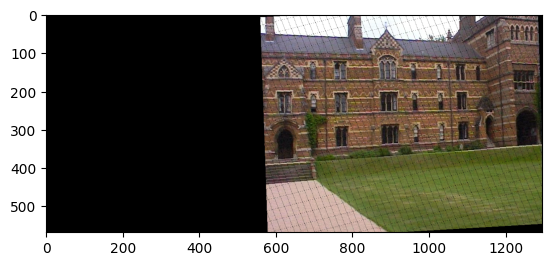

In [23]:
plt.imshow(transformed_img1[:,:,::-1])
plt.show()
plt.imshow(transformed_img2[:,:,::-1])
plt.show()
plt.imshow(transformed_img3[:,:,::-1])
plt.show()

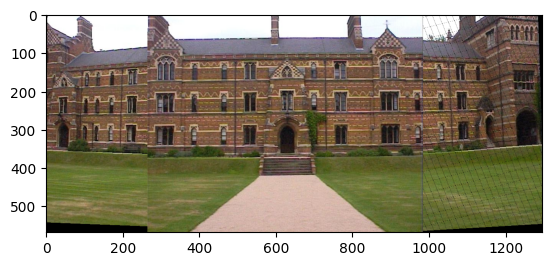

In [24]:
def sobrepor_imagens(img1:np.ndarray, img2:np.ndarray) -> np.ndarray:
    result = img2
    lines, cols = img1.shape[:2]
    
    for lin in range(lines):
        for col in range(cols):
            pixel = img1[lin, col]
            if pixel.all() != 0:
                result[lin, col] = pixel

    return result

result = sobrepor_imagens(transformed_img1, transformed_img3)
result = sobrepor_imagens(transformed_img2, result)
plt.imshow(result[:,:,::-1])
plt.show()